# <center>KMeans model</center>

In [39]:
import pandas as pd
import numpy as np 

#KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

# # Let's make some more blobs to test K-Means on
# data, color = make_blobs(n_samples=100, random_state=29, centers=3, cluster_std=1.5)

In [20]:
#read in data
data = pd.read_csv('../data/beer_data.csv')
data.head(3)

,review_profilename,beer_beerid,beer_name,beer_abv,beer_style,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,Nibbley,776,Samichlaus Bier,14.00,Doppelbock,5.0,5.0,5.0,5.0,5.0
1,BeerTitan,1441,Young's Old Nick Barley Wine Ale,7.20,English Barleywine,4.5,4.5,4.0,4.5,4.0
2,Morey,46809,Flashback Ale,6.88,American Brown Ale,3.5,3.5,4.0,4.0,3.5


In [21]:
# ????? Maybe ?????
#Relabeling numerical columns
#x1 = review_overall
#x2 = review_aroma
#x3 = review_appearance
#x4 = review_palate
#x5 = review_taste
data.shape

(15185, 10)

In [22]:
# Let's prepare our X matrix
X = data.loc[:, ['review_overall', 
               'review_aroma', 
               'review_appearance', 
               'review_palate', 
               'review_taste']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#----
#or
## Let's prepare our X matrix
# ss = StandardScaler()
# X = ss.fit_transform(df[['x1', 'x2']])

In [23]:
X.mean(axis=0)

review_overall       3.832137
review_aroma         3.748568
review_appearance    3.858413
review_palate        3.759796
review_taste         3.811294
dtype: float64

In [24]:
X.std(axis=0)

review_overall       0.716733
review_aroma         0.695321
review_appearance    0.612646
review_palate        0.679274
review_taste         0.725155
dtype: float64

In [25]:
#the more clusters the better
km = KMeans(n_clusters=5)
km.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
# Check out centroids
#cluster centers of 5 x 5 matrix
km.cluster_centers_

array([[ 0.97826127,  0.97296309,  0.88382287,  1.00242081,  1.03271438],
       [ 0.36959487,  0.35463359,  0.29981486,  0.36877021,  0.39667214],
       [-2.65597921, -2.42696727, -2.25528983, -2.49956376, -2.65216709],
       [-1.12682467, -1.08387755, -0.90813122, -1.13451024, -1.22329745],
       [-0.22481522, -0.25459975, -0.23412203, -0.25796262, -0.24945065]])

In [27]:
#Class attribute
#these are the clusters
km.labels_

array([0, 0, 4, ..., 1, 4, 4], dtype=int32)

In [28]:
#Predict (option 2)
#returns the same as km.labels_
km.predict(X_sc)

array([0, 0, 4, ..., 1, 4, 4], dtype=int32)

In [29]:
# attach predicted cluster to original points
data['cluster'] = km.labels_
data.head()

,review_profilename,beer_beerid,beer_name,beer_abv,beer_style,review_overall,review_aroma,review_appearance,review_palate,review_taste,cluster
0,Nibbley,776,Samichlaus Bier,14.00,Doppelbock,5.0,5.0,5.0,5.0,5.0,0
1,BeerTitan,1441,Young's Old Nick Barley Wine Ale,7.20,English Barleywine,4.5,4.5,4.0,4.5,4.0,0
2,Morey,46809,Flashback Ale,6.88,American Brown Ale,3.5,3.5,4.0,4.0,3.5,4
3,tempest,2704,St-Ambroise Oatmeal Stout,5.00,Oatmeal Stout,4.0,5.0,4.0,4.0,3.5,1
4,KoG,248,Hoegaarden Original White Ale,4.90,Witbier,5.0,3.5,4.0,4.5,4.5,0


In [30]:
km.cluster_centers_

array([[ 0.97826127,  0.97296309,  0.88382287,  1.00242081,  1.03271438],
       [ 0.36959487,  0.35463359,  0.29981486,  0.36877021,  0.39667214],
       [-2.65597921, -2.42696727, -2.25528983, -2.49956376, -2.65216709],
       [-1.12682467, -1.08387755, -0.90813122, -1.13451024, -1.22329745],
       [-0.22481522, -0.25459975, -0.23412203, -0.25796262, -0.24945065]])

In [31]:
#cluster centroids are the mean coordinates of every point in that cluster
#saved into a dataframe (just the cluster centers)
centroids = data.groupby('cluster')[['review_overall', 
               'review_aroma', 
               'review_appearance', 
               'review_palate', 
               'review_taste']].mean()
centroids

#can also use this inverse code to get the same answer
# centroids = pd.DataFrame(
#     sc.inverse_transform(km.cluster_centers_),
#     columns=["x1", "x2"]
# )

,review_overall,review_aroma,review_appearance,review_palate,review_taste
cluster,,,,,
0,4.533266,4.425067,4.399866,4.440692,4.560148
1,4.097029,3.995144,4.042087,4.010284,4.098934
2,1.928571,2.061102,2.476764,2.061962,1.888124
3,3.024531,2.994949,3.302068,2.989177,2.924242
4,3.671010,3.571545,3.714984,3.584574,3.630409


In [32]:
# plt.figure(figsize=(7,7));

# ## Plot scatter by cluster / color, and centroids
# colors = ["red", "green", "blue"]
# data['color'] = data['cluster'].map(lambda p: colors[p])

# ax = df.plot(    
#     kind="scatter", 
#     x="x1", y="x2",
#     figsize=(10,8),
#     c = df['color']
# )

# centroids.plot(
#     kind="scatter", 
#     x="x1", y="x2", 
#     marker="*", c=["r", "g", "b"], s=550,
#     ax=ax
# );

In [33]:
km.inertia_

26319.485257476976

In [34]:
#Calculating Silhouette score in sklearn
from sklearn.metrics import silhouette_score

In [35]:
# Used only 1% random sample of my data (15_000+ rows)
# Anything over 20_000 will take a long time and overheat computer-- 
# use cloud if there's big data
silhouette_score(X_sc, km.labels_)

0.18785558350123616

In [36]:
scores = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [37]:
score_df.head()

,k,inertia,silhouette
0,2,42939.409895,0.425468
1,3,32990.066651,0.283089
2,4,28678.759888,0.220555
3,5,26319.500342,0.187870
4,6,24372.528319,0.184398


Text(0.5, 1.0, 'Silhouette Score over k')

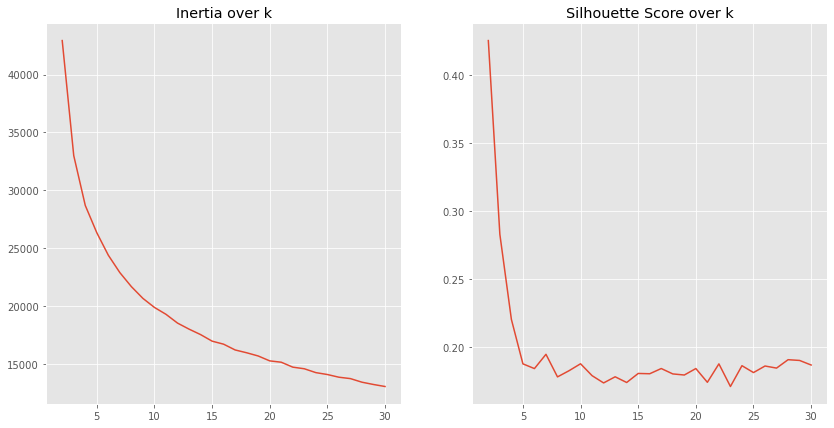

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')